### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
from itertools import izip
from utils.util import get_data, plot_data, get_bollinger_bands, plot_bollinger_band
from utils.backtesting import simulate_strategy

### Initialization

In [2]:
date_start = '2007-12-31'
date_end = '2009-12-31'
folder_data = 'data'
folder_output = 'out'
file_output = 'bollingerstrategy' 
make_file_out_unique = False  #When True generate new file at each run
stock = 'IBM'
shares = 100

dates = pd.date_range(date_start, date_end)

### Load Stock Data

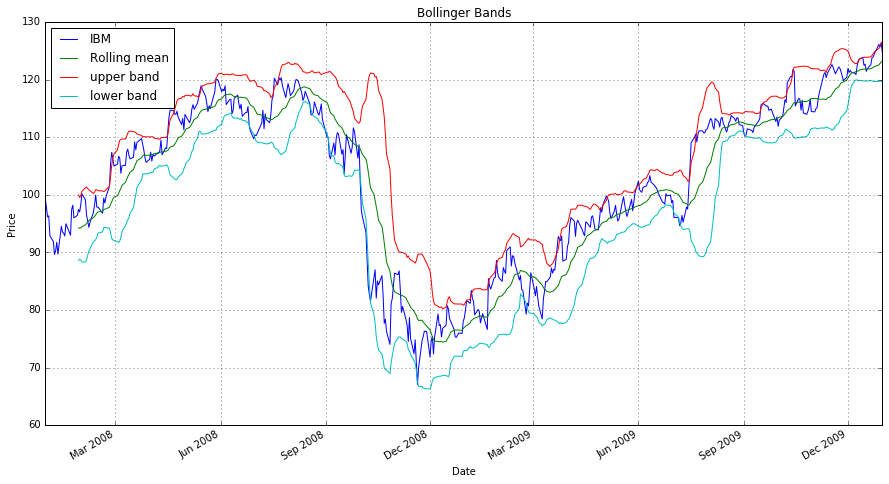

,IBM,rolling_mean,upper_band,lower_band
2009-12-24,124.44,122.2245,124.809073,119.639927
2009-12-28,126.10,122.5395,125.400744,119.678256
2009-12-29,125.66,122.8015,125.801825,119.801175
2009-12-30,126.35,123.0220,126.382342,119.661658
2009-12-31,124.76,123.1980,126.533996,119.862004


In [3]:
prices_all = get_data([stock], dates)
df = get_bollinger_bands(prices_all[stock])
df.tail()

### Technical Indicators

In [4]:
# Compute Bollinger Values
df['BB'] = (df[stock]-df['rolling_mean'])/(df['upper_band']-df['rolling_mean'])

# Compute Momentum
win_mom = 5
df['MOM'] = df[stock]/df[stock].shift(periods=win_mom)-1

# Compute Simple Moving Average
win_sma = 5
df['SMA'] = (df[stock]/df[stock].rolling(window=win_sma).mean())-1

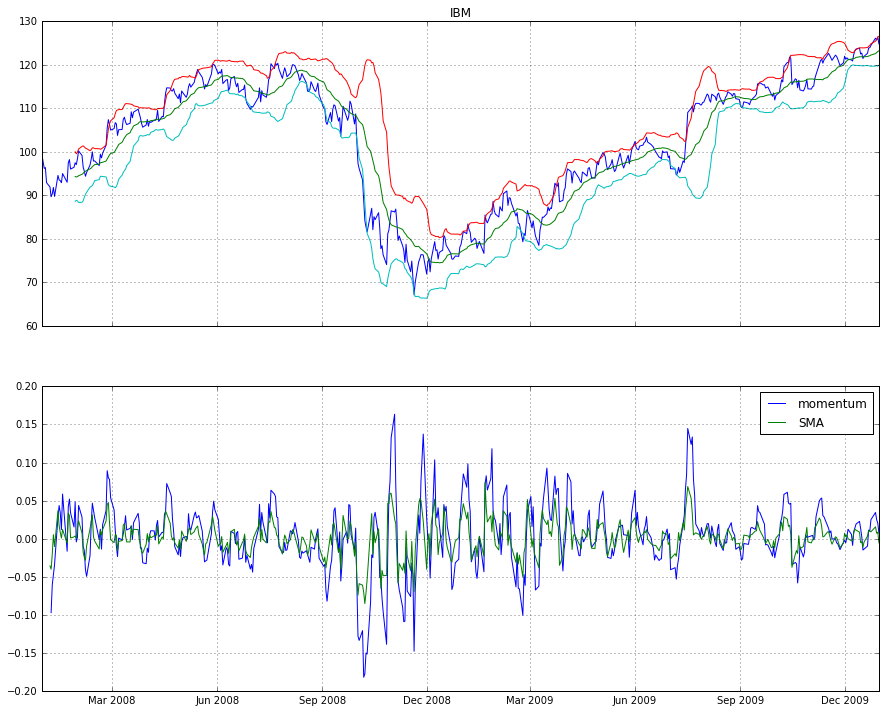

In [5]:
f, ax = plt.subplots(2, sharex=True, figsize=(15,12)) 
ax[0].plot(df[stock])
ax[0].plot(df['rolling_mean'])
ax[0].plot(df['upper_band'])
ax[0].plot(df['lower_band'])
ax[0].set_title(stock)
ax[0].grid(True)

ax[1].plot(df['MOM'], label="momentum")
ax[1].plot(df['SMA'], label="SMA")
ax[1].grid(True)
ax[1].legend()

plt.show()

In [6]:
df.to_csv(folder_output+'\\tech_indicators.csv')